In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [0]:
data=pd.read_csv('data.txt',header=None)
data.columns=['a','b','c']

In [0]:
class SigmoidNeuron:
  
  def __init__(self):
    self.w = np.random.normal(scale=1 / (2)**.5, size=2)
    self.b = 0
    
  def perceptron(self, x):
    return np.dot(x, self.w.T) + self.b
  
  def sigmoid(self, x):
    return 1.0/(1.0 + np.exp(-x))
  
  def grad_w(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y) * y_pred * (1 - y_pred) * x
  
  def grad_b(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y) * y_pred * (1 - y_pred)
  
  def fit(self, X, Y, epochs=1, learning_rate=1, initialise=True):
    
    # initialise w, b
    if initialise:
      self.w = np.random.normal(scale=1 / (2)**.5, size=2)
      self.b = 0
    
    for i in range(epochs):
      dw = 0
      db = 0
      for x, y in zip(X, Y):
        dw += self.grad_w(x, y)
        db += self.grad_b(x, y)       
      self.w -= learning_rate * dw
      self.b -= learning_rate * db

def plot_sn(X, Y, sn, ax):
  X1 = np.linspace(-10, 10, 100)
  X2 = np.linspace(-10, 10, 100)
  XX1, XX2 = np.meshgrid(X1, X2)
  YY = np.zeros(XX1.shape)
  for i in range(X2.size):
    for j in range(X1.size):
      val = np.asarray([X1[j], X2[i]])
      YY[i, j] = sn.sigmoid(sn.perceptron(val))
  plt.contourf(XX1, XX2, YY, cmap='seismic', alpha=0.6)
  plt.scatter(data[['a']],data[['b']],c=data[['c']].values,cmap='seismic')
  plt.xlim((0,1.2))
  plt.ylim((0,1.2))
  ax.plot()

In [0]:
class SigmoidNeuron_ce:
  
  def __init__(self):
    self.w = np.random.normal(scale=1 / (2)**.5, size=2)
    self.b = 0
    
  def perceptron(self, x):
    return np.dot(x, self.w.T) + self.b
  
  def sigmoid(self, x):
    return 1.0/(1.0 + np.exp(-x))
  
  def grad_w(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y) * x
  
  def grad_b(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y) 
  
  def fit(self, X, Y, epochs=1, learning_rate=1, initialise=True):
    
    # initialise w, b
    if initialise:
      self.w = np.random.normal(scale=1 / (2)**.5, size=2)
      self.b = 0
    
    for i in range(epochs):
      dw = 0
      db = 0
      for x, y in zip(X, Y):
        dw += self.grad_w(x, y)
        db += self.grad_b(x, y)       
      self.w -= learning_rate * dw
      self.b -= learning_rate * db

In [0]:
%matplotlib inline
from matplotlib import animation, rc
from IPython.display import HTML

In [0]:
def animate(m):
  # ax.clear()
  # xx=np.linspace(0,1,20)
  # ax.scatter(data[['a']],data[['b']],c=data[['c']].values,cmap='seismic')
  # YY = np.zeros(XX1.shape)
  # for i in range(X2.size):
  #   for j in range(X1.size):
  #     val = np.asarray([X1[j], X2[i]])
  #     YY[i, j] = sigmoid(prediction(val,boundary_lines[m],b_s[m]))
  # ax.contourf(XX1, XX2, YY, cmap='seismic', alpha=0.6)
  # #ax.text(0.12,1,'slope : '+str(boundary_lines[i][0]))
  # #ax.text(0.12,0.95,'b : '+str(boundary_lines[i][1]))
  # plt.xlim((0,1.2))
  # plt.ylim((0,1.2))
  # ax.plot()
  X1 = np.linspace(-0.1, 1.2, 100)
  X2 = np.linspace(-0.1, 1.2, 100)
  XX1, XX2 = np.meshgrid(X1, X2)
  if m==0:
    ax1.scatter(data[['a']],data[['b']],c=data[['c']].values,cmap='seismic')
    ax2.scatter(data[['a']],data[['b']],c=data[['c']].values,cmap='seismic')

    YY = np.zeros(XX1.shape)

    for i in range(X2.size):
      for j in range(X1.size):
        val = np.asarray([X1[j], X2[i]])
        YY[i, j] = sn.sigmoid(sn.perceptron(val))
    ax1.contourf(XX1, XX2, YY, cmap='seismic', alpha=0.6)

    for i in range(X2.size):
      for j in range(X1.size):
        val = np.asarray([X1[j], X2[i]])
        YY[i, j] = sn_ce.sigmoid(sn_ce.perceptron(val))
    ax2.contourf(XX1, XX2, YY, cmap='seismic', alpha=0.6)
    ax1.set_xlim((-0.1,1.2))
    ax1.set_ylim((-0.1,1.2))
    ax2.set_xlim((-0.1,1.2))
    ax2.set_ylim((-0.1,1.2))

  else:
    for x,y in zip(data[['a','b']].values,data['c'].values):
      sn.fit([x],[y],1,0.01,False)
      sn_ce.fit([x],[y],1,0.01,False)

      ax1.clear()
      ax2.clear()
      
      ax1.scatter(data[['a']],data[['b']],c=data[['c']].values,cmap='seismic')
      ax2.scatter(data[['a']],data[['b']],c=data[['c']].values,cmap='seismic')

      YY = np.zeros(XX1.shape)
      for i in range(X2.size):
        for j in range(X1.size):
          val = np.asarray([X1[j], X2[i]])
          YY[i, j] = sn.sigmoid(sn.perceptron(val))
      ax1.contourf(XX1, XX2, YY, cmap='seismic', alpha=0.6)
      ax1.set_xlim((-0.1,1.2))
      ax1.set_ylim((-0.1,1.2))

      YY = np.zeros(XX1.shape)
      for i in range(X2.size):
        for j in range(X1.size):
          val = np.asarray([X1[j], X2[i]])
          YY[i, j] = sn_ce.sigmoid(sn_ce.perceptron(val))
      ax2.contourf(XX1, XX2, YY, cmap='seismic', alpha=0.6)
      ax2.set_xlim((-0.1,1.2))
      ax2.set_ylim((-0.1,1.2))
  


In [0]:
X=data[['a','b']].values
Y=data['c'].values

In [55]:
np.random.seed(42)
sn = SigmoidNeuron()
np.random.seed(42)
sn_ce = SigmoidNeuron_ce()
print(sn.w)
print(sn_ce.w)

[ 0.35122995 -0.09776762]
[ 0.35122995 -0.09776762]


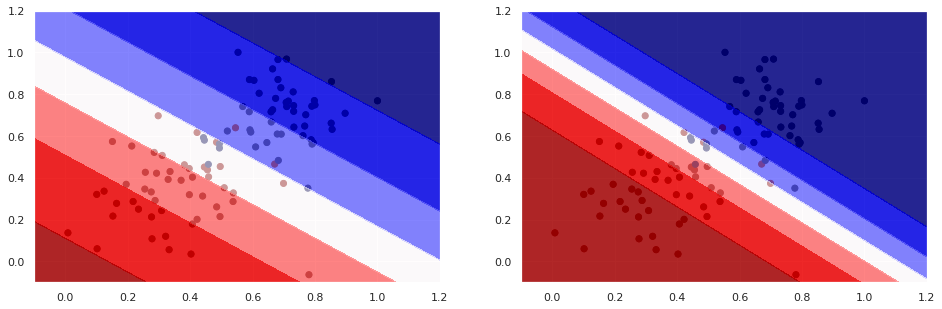

In [56]:

figg, (ax1, ax2) = plt.subplots(1, 2,figsize=(8*2,5)) 
ax=plt.gca()
anim = animation.FuncAnimation(figg, animate,300,interval=100 ,blit=False)
HTML(anim.to_html5_video())